# Correlation Analysis

**Note:** Goal is to calculate and look at the correlation coefficients (Pearson correlation) to determine the strength and direction of the relationships between the variables of interest, such as availability (availability_365), number of reviews (number_of_reviews), and booking frequency (reviews_per_month).

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# statistical tests
import scipy.stats as stats

## Import Data

In [2]:
clean_data = pd.read_csv('../data/cleaned_data.csv')

clean_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,total_of_host_listings_count
0,879181,287172,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,0.80,247,4,jimi hendrix neighborhood 3,female,2
1,6606,14942,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,0.95,99,2,fab privat seattl urban cottag,female,3
2,902609,3264544,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,1.95,206,27,entir guest suit inest seattl,male,5
3,9419,30559,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,1.14,356,20,gloriou sun room memori foamb,male,9
4,226536,209571,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2.28,209,53,seren room sunni cottag near discoveri park,female,1


## Correlation matrix

In [3]:
# Correlation  matrix as a table
numeric_columns = clean_data[['availability_365', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Convert a DataFrame
correlation_table = pd.DataFrame(correlation_matrix)

correlation_table

,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm
availability_365,1.000000,-0.088089,-0.086965,-0.052223
number_of_reviews,-0.088089,1.000000,0.559307,0.590852
reviews_per_month,-0.086965,0.559307,1.000000,0.841688
number_of_reviews_ltm,-0.052223,0.590852,0.841688,1.000000


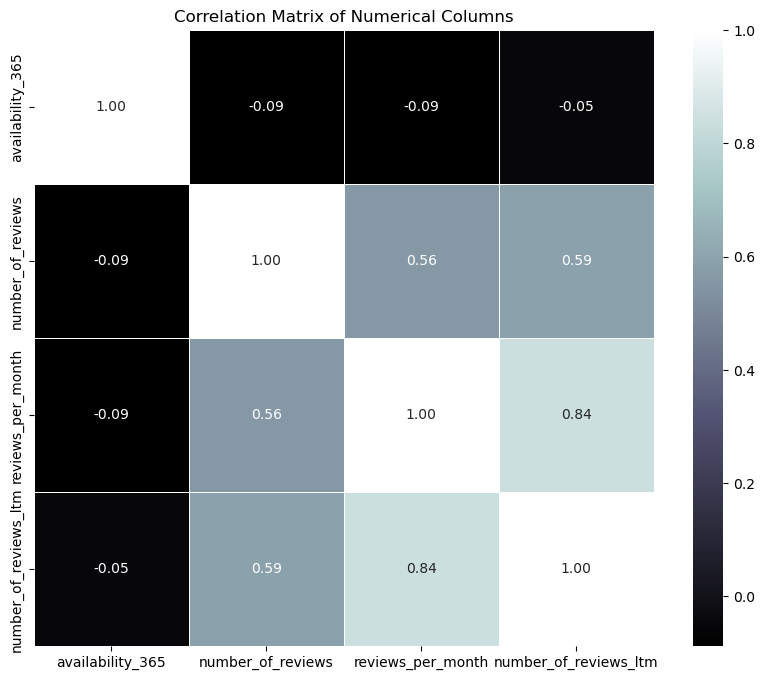

In [4]:
# Select the numerical columns of interest
numeric_columns = clean_data[['availability_365', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, 
            annot = True, 
            cmap = "bone", 
            fmt = ".2f", 
            linewidths = 0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

**Note:** The correlation coefficients range between -1 and 1. A coefficient of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Hence, Consider the signs of the correlation coefficients. A positive coefficient indicates a positive relationship (as one variable increases, the other also tends to increase), while a negative coefficient indicates a negative relationship (as one variable increases, the other tends to decrease).
- Availability (availability_365) has a weak negative correlation with the number of reviews (number_of_reviews), reviews per month (reviews_per_month), and the number of reviews in the last twelve months (number_of_reviews_ltm). This suggests that as availability increases, there tends to be a slight decrease in the number of reviews. This makes sence since people want to rent a places with a lot of reviews. Also, thismakes sence since when place is rented by osomeone is shows as no available.

- The number of reviews and reviews per month exhibit a moderate positive correlation of 0.56, indicating that properties with a higher number of reviews also tend to have higher reviews per month.

- The strongest correlation is observed between reviews per month and the number of reviews in the last twelve months, with a correlation coefficient of 0.84. This suggests a strong positive relationship between these two variables, indicating that properties with higher reviews per month also tend to have a higher number of reviews in the last twelve months.

## Needed Visualizations from EDA part

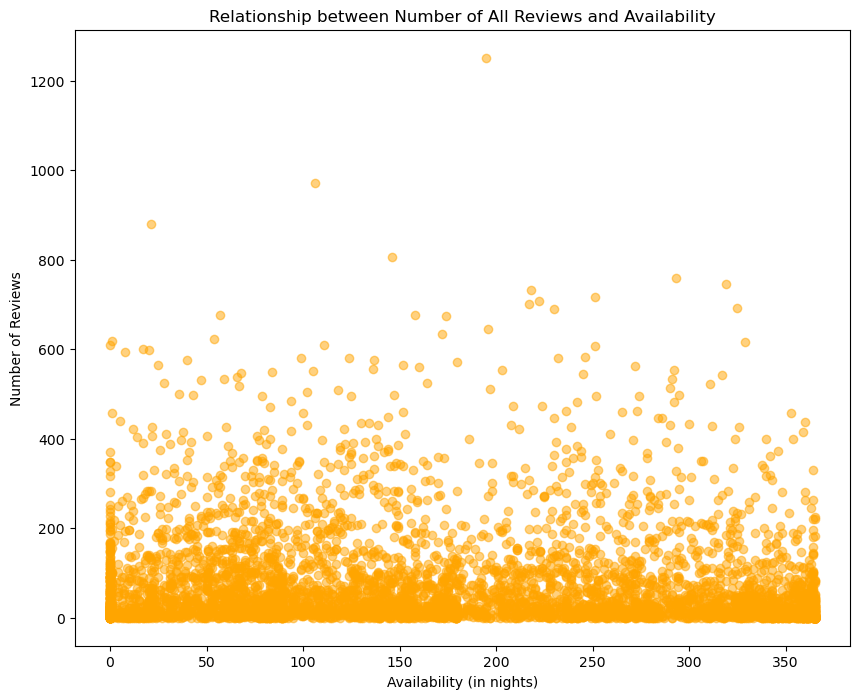

In [5]:
# avilability vs. number_of_reviews
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], clean_data['number_of_reviews'], color = 'orange', alpha = 0.5)
plt.ylabel('Number of Reviews')
plt.xlabel('Availability (in nights)')
plt.title('Relationship between Number of All Reviews and Availability')
plt.show()

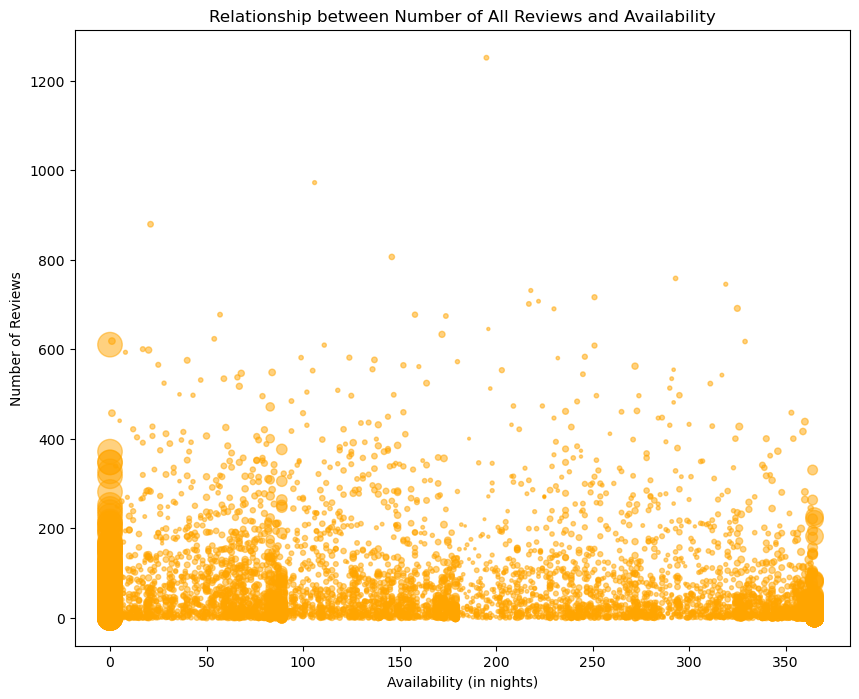

In [6]:
value_counts = clean_data['availability_365'].value_counts()
sizes = [value_counts[count] for count in clean_data['availability_365']]

plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], 
            clean_data['number_of_reviews'], 
            color = 'orange', 
            alpha = 0.5, 
            s = sizes)

plt.xlabel('Availability (in nights)')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Number of All Reviews and Availability')
plt.show()

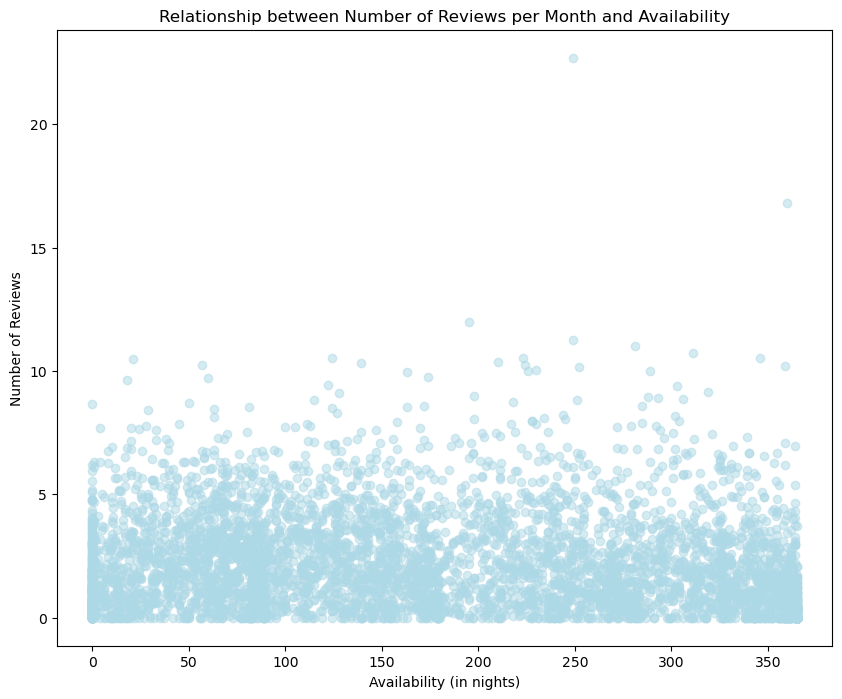

In [7]:
# avilability vs. reviews_per_month
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], clean_data['reviews_per_month'], color = 'lightblue', alpha = 0.5)
plt.ylabel('Number of Reviews')
plt.xlabel('Availability (in nights)')
plt.title('Relationship between Number of Reviews per Month and Availability')
plt.show()

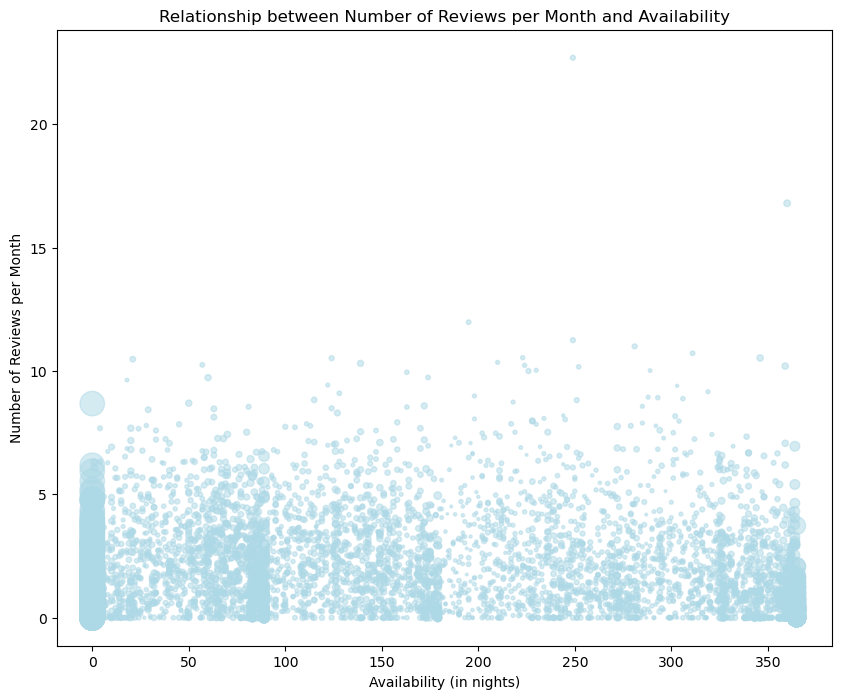

In [8]:
value_counts = clean_data['availability_365'].value_counts()
sizes = [value_counts[count] for count in clean_data['availability_365']]

plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], 
            clean_data['reviews_per_month'], 
            color = 'lightblue', 
            alpha = 0.5, 
            s = sizes)

plt.xlabel('Availability (in nights)')
plt.ylabel('Number of Reviews per Month')
plt.title('Relationship between Number of Reviews per Month and Availability')
plt.show()

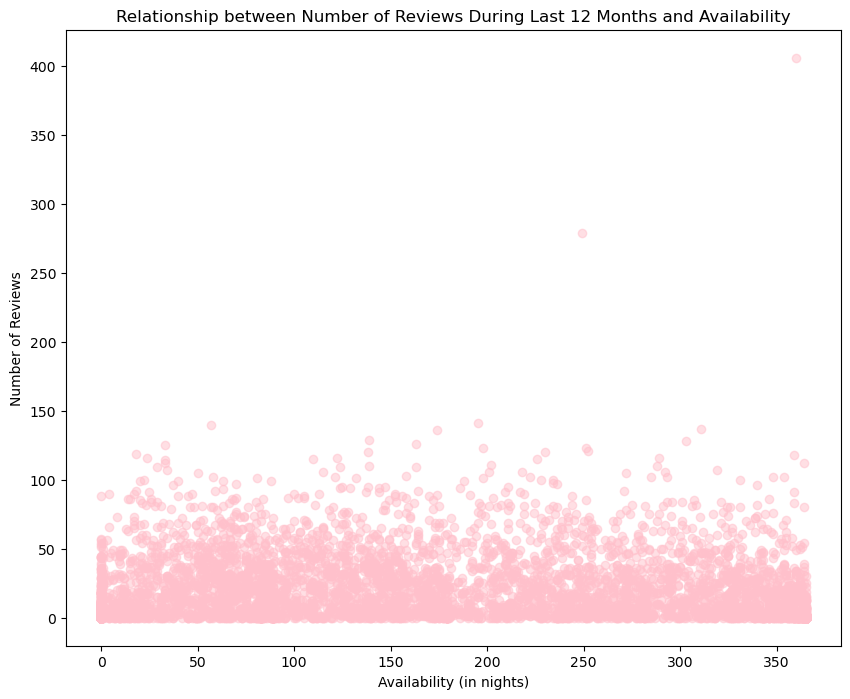

In [9]:
# avilability vs. number_of_reviews_ltm
plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], clean_data['number_of_reviews_ltm'], color = 'pink', alpha = 0.5)
plt.ylabel('Number of Reviews')
plt.xlabel('Availability (in nights)')
plt.title('Relationship between Number of Reviews During Last 12 Months and Availability')
plt.show()

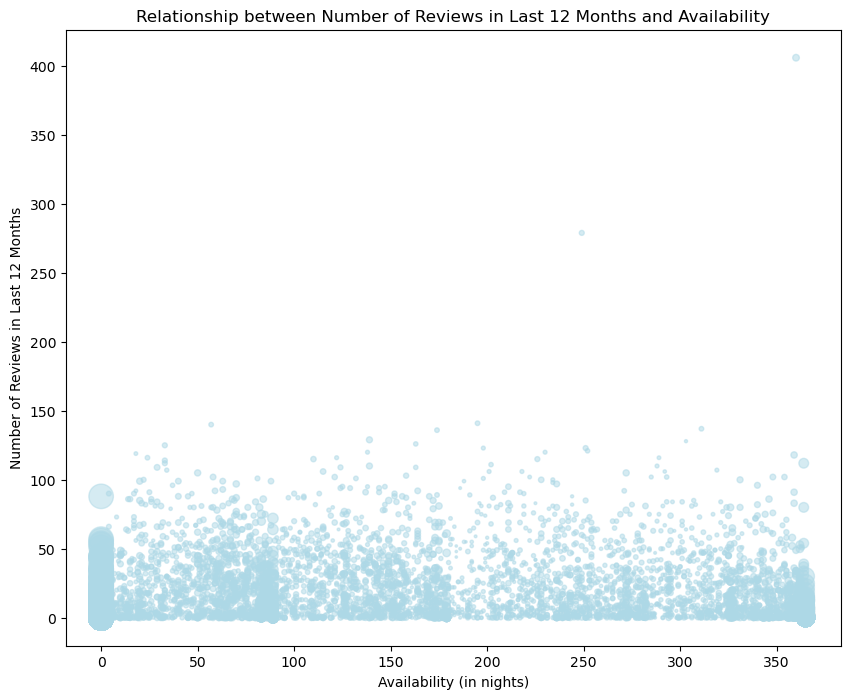

In [10]:
value_counts = clean_data['availability_365'].value_counts()
sizes = [value_counts[count] for count in clean_data['availability_365']]

plt.figure(figsize = (10, 8))
plt.scatter(clean_data['availability_365'], 
            clean_data['number_of_reviews_ltm'], 
            color = 'lightblue', 
            alpha = 0.5, 
            s = sizes)

plt.xlabel('Availability (in nights)')
plt.ylabel('Number of Reviews in Last 12 Months')
plt.title('Relationship between Number of Reviews in Last 12 Months and Availability')
plt.show()

**Note:** based on the scatter plots:

- The scatter plots illustrate the relationships between availability (in nights) and various review-related metrics: number of all reviews, number of reviews during the last 12 months, and number of reviews per month.

- The majority of the data points in all three plots are located in the lower 1/4 of the availability range, indicating that most listings have low availability and tend to receive a relatively lower number of reviews.

- There are a few high outliers in each plot, suggesting that some properties with higher availability may attract a significantly larger number of reviews. These outliers could be explored further to understand the factors contributing to their popularity.

- While the plots show a general trend of low availability associated with a lower number of reviews, it is important to note that the relationship is not strictly linear. There is a range of availability values where the number of reviews varies, indicating potential factors other than availability influencing the review counts.

- The visualizations you have created show that there is a concentration of data points in the lower values of availability and number of reviews. Specifically, the majority of listings have lower availability (1 to 10 nights) and lower numbers of reviews (0 to 60 reviews in the last 12 months, 6 reviews per month, and 400 all-time reviews). This pattern suggests that there is high demand for listings with limited availability, as they tend to receive a significant number of reviews. The concentration of data points in the lower values indicates that these listings are more popular and likely attract more guests.

## Stats Tests

**Note:** I decided to use 3 tests:
- Pearson Correlation Test: This test measures the linear correlation between two continuous variables. It assumes that the variables are normally distributed and have a linear relationship. It provides information about the strength and direction of a linear relationship.
- Spearman Correlation Test: This test assesses the monotonic relationship between variables. It is suitable for variables that may not have a linear relationship. It ranks the data and measures the correlation based on the ranks, not the actual values. It is useful when the relationship is non-linear or the data may have outliers
- Kendall's Rank Correlation Test: This test also measures the ordinal association between variables. It is used when the variables are ranked. It provides a measure of the strength and direction of the relationship between variables, considering the ranks rather than the actual values. It is useful when the relationship is not necessarily linear and the data may contain ties.

In [11]:
# Pearson Correlation Test
pearson_corr_reviews, pearson_p_value_reviews = stats.pearsonr(clean_data['availability_365'], clean_data['number_of_reviews'])
pearson_corr_month, pearson_p_value_month = stats.pearsonr(clean_data['availability_365'], clean_data['reviews_per_month'])
pearson_corr_ltm, pearson_p_value_ltm = stats.pearsonr(clean_data['availability_365'], clean_data['number_of_reviews_ltm'])

print("Pearson Correlation Coefficient (number_of_reviews):", pearson_corr_reviews)
print("Pearson p-value (number_of_reviews):", pearson_p_value_reviews)
print("Pearson Correlation Coefficient (reviews_per_month):", pearson_corr_month)
print("Pearson p-value (reviews_per_month):", pearson_p_value_month)
print("Pearson Correlation Coefficient (number_of_reviews_ltm):", pearson_corr_ltm)
print("Pearson p-value (number_of_reviews_ltm):", pearson_p_value_ltm)

Pearson Correlation Coefficient (number_of_reviews): -0.08808937947205561
Pearson p-value (number_of_reviews): 6.116306114655896e-10
Pearson Correlation Coefficient (reviews_per_month): -0.08696459954048003
Pearson p-value (reviews_per_month): 1.0082620251760898e-09
Pearson Correlation Coefficient (number_of_reviews_ltm): -0.052223044058914946
Pearson p-value (number_of_reviews_ltm): 0.0002487749445289736


**Note:** Based on the Pearson correlation test results:

The variable 'availability_365' has a weak negative correlation with 'number_of_reviews' (correlation coefficient = -0.088, p-value < 0.001).
The variable 'availability_365' has a weak negative correlation with 'reviews_per_month' (correlation coefficient = -0.087, p-value < 0.001).
The variable 'availability_365' has a weak negative correlation with 'number_of_reviews_ltm' (correlation coefficient = -0.052, p-value = 0.0002).

These results indicate that there is a statistically significant but weak negative relationship between the availability of listings and the number of reviews. As the availability decreases, there is a slight tendency for the number of reviews to increase, although the effect size is small. It is important to note that correlation does not imply causation, and other factors may influence the relationship between these variables.

In conclusion, based on the Pearson correlation test, there is evidence of a weak negative correlation between the availability of listings and the number of reviews.

In [12]:
# Spearman Correlation Test
spearman_corr_reviews, spearman_p_value_reviews = stats.spearmanr(clean_data['availability_365'], clean_data['number_of_reviews'])
spearman_corr_month, spearman_p_value_month = stats.spearmanr(clean_data['availability_365'], clean_data['reviews_per_month'])
spearman_corr_ltm, spearman_p_value_ltm = stats.spearmanr(clean_data['availability_365'], clean_data['number_of_reviews_ltm'])

print("Spearman Correlation Coefficient (number_of_reviews):", spearman_corr_reviews)
print("Spearman p-value (number_of_reviews):", spearman_p_value_reviews)
print("Spearman Correlation Coefficient (reviews_per_month):", spearman_corr_month)
print("Spearman p-value (reviews_per_month):", spearman_p_value_month)
print("Spearman Correlation Coefficient (number_of_reviews_ltm):", spearman_corr_ltm)
print("Spearman p-value (number_of_reviews_ltm):", spearman_p_value_ltm)

Spearman Correlation Coefficient (number_of_reviews): -0.1365145564318308
Spearman p-value (number_of_reviews): 6.898054903240499e-22
Spearman Correlation Coefficient (reviews_per_month): -0.10975170821405467
Spearman p-value (reviews_per_month): 1.1881931791585831e-14
Spearman Correlation Coefficient (number_of_reviews_ltm): -0.06687659215479352
Spearman p-value (number_of_reviews_ltm): 2.685204269740694e-06


**Note:** Based on the Spearman correlation test results:

The variable 'availability_365' has a moderate negative correlation with 'number_of_reviews' (correlation coefficient = -0.137, p-value < 0.001).
The variable 'availability_365' has a moderate negative correlation with 'reviews_per_month' (correlation coefficient = -0.110, p-value < 0.001).
The variable 'availability_365' has a weak negative correlation with 'number_of_reviews_ltm' (correlation coefficient = -0.067, p-value < 0.001).

These results suggest that there is a statistically significant negative correlation between the availability of listings and the number of reviews. As the availability decreases, there is a tendency for the number of reviews to increase, although the effect size is moderate to weak. The Spearman correlation test is suitable for capturing non-linear relationships, and its results reinforce the findings from the Pearson correlation test.

In conclusion, based on the Spearman correlation test, there is evidence of a moderate negative correlation between the availability of listings and the number of reviews. This suggests that lower availability may lead to higher review activity.

In [13]:
# Kendall's Rank Correlation Test
kendall_corr_reviews, kendall_p_value_reviews = stats.kendalltau(clean_data['availability_365'], clean_data['number_of_reviews'])
kendall_corr_month, kendall_p_value_month = stats.kendalltau(clean_data['availability_365'], clean_data['reviews_per_month'])
kendall_corr_ltm, kendall_p_value_ltm = stats.kendalltau(clean_data['availability_365'], clean_data['number_of_reviews_ltm'])

print("Kendall's Rank Correlation Coefficient (number_of_reviews):", kendall_corr_reviews)
print("Kendall p-value (number_of_reviews):", kendall_p_value_reviews)
print("Kendall's Rank Correlation Coefficient (reviews_per_month):", kendall_corr_month)
print("Kendall p-value (reviews_per_month):", kendall_p_value_month)
print("Kendall's Rank Correlation Coefficient (number_of_reviews_ltm):", kendall_corr_ltm)
print("Kendall p-value (number_of_reviews_ltm):", kendall_p_value_ltm)

Kendall's Rank Correlation Coefficient (number_of_reviews): -0.0927708384164532
Kendall p-value (number_of_reviews): 4.618456248775508e-22
Kendall's Rank Correlation Coefficient (reviews_per_month): -0.07429783196698389
Kendall p-value (reviews_per_month): 8.790483749471112e-15
Kendall's Rank Correlation Coefficient (number_of_reviews_ltm): -0.04691510733245264
Kendall p-value (number_of_reviews_ltm): 1.2992908161713708e-06


**Note:** Based on the Kendall's Rank correlation test results:

The variable 'availability_365' has a weak negative correlation with 'number_of_reviews' (correlation coefficient = -0.093, p-value < 0.001).
The variable 'availability_365' has a weak negative correlation with 'reviews_per_month' (correlation coefficient = -0.074, p-value < 0.001).
The variable 'availability_365' has a weak negative correlation with 'number_of_reviews_ltm' (correlation coefficient = -0.047, p-value < 0.001).
These results indicate that there is a statistically significant weak negative correlation between the availability of listings and the number of reviews, reviews per month, and number of reviews during the last 12 months. It suggests that as the availability decreases, there is a tendency for the review-related variables to increase, although the effect size is weak. The Kendall's Rank correlation test is suitable for assessing ordinal associations between variables.

In conclusion, based on the Kendall's Rank correlation test, there is evidence of a weak negative correlation between the availability of listings and the review-related variables. This suggests that lower availability may be associated with higher review activity.